# 03-02. 선형 회귀


In [18]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 훈련 세트와 테스트 세트로 분할 후 2차원 배열로 변환
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# 최근접 이웃 개수를 3으로 하는 모델을 생성, 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

# 길이가 50인 농어 예측
print(knr.predict([[50]]))

[1033.33333333]


실제 무게에 비해적은 수치로 예측

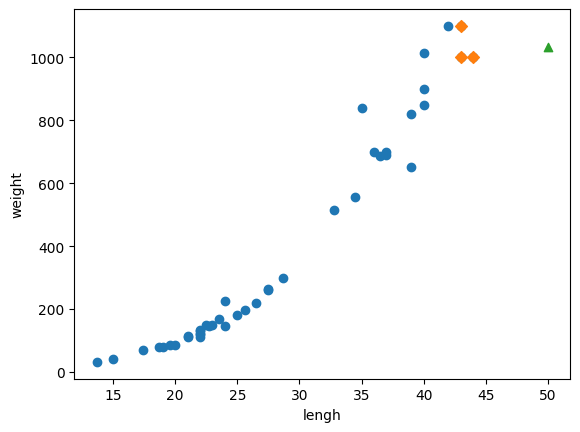

In [10]:
import matplotlib.pyplot as plt

disnaces,indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)  # 전체 데이터
plt.scatter(train_input[indexes], train_target[indexes], marker='D')  # 이웃 데이터
plt.scatter(50, 1033, marker='^')  # 50cm 농어 데이터
plt.xlabel('lengh')
plt.ylabel('weight')
plt.show()

In [12]:
print(knr.predict([[50]]))  # 모델의 예측 무게
print(np.mean(train_target[indexes]))  # 이웃 무게의 평균

[1033.33333333]
1033.3333333333333


- 길이가 늘면 당연히 무게도 늘어야 하지만, K-NN 알고리즘은 주변 이웃의 값을 평균하기에 훈련 세트의 범위를 벗어나면 실제와 괴리 발생

In [13]:
# 훨씬 큰 수를 넣어도 훈련 세트의 범위를 벗어났다면 같은 값만 출력
print(knr.predict([[100]]))

[1033.33333333]


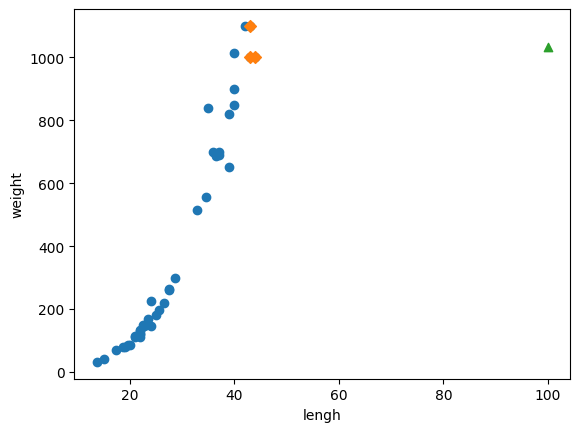

In [14]:
import matplotlib.pyplot as plt

disnaces,indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)  # 전체 데이터
plt.scatter(train_input[indexes], train_target[indexes], marker='D')  # 이웃 데이터
plt.scatter(100, 1033, marker='^')  # 100cm 농어 데이터
plt.xlabel('lengh')
plt.ylabel('weight')
plt.show()

## 선형 회귀(linear regression)
- 특성이 하나일 때, 해당 특성을 가장 잘 나타낼 수 있는 직선을 찾아 학습하는 대표적인 회귀 알고리즘
- 직선은 y = a * x + b의 형태를 갖는다.
    - x: 농어의 길이
    - y: 농어의 무게
- 선형 회귀가 찾은 특성과 타깃 사이의 관계는 계수 또는 가중치(대부분 기울기와 절편)에 저장

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

# 50cm 농어의 무게 예측
print(lr.predict([[50]]))

[1241.83860323]


In [22]:
# 선형 회귀 알고리즘이 찾은 x의 계수와 y절편은 coef_와 intercept_에 저장됨
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- 모델 기반 학습: 알고리즘의 훈련을 통해 최적의 모델 파라미터를 찾는 학습
  - 모델 파라미터(model parameter): 머신러닝 알고리즘이 찾은 값(coef_,
   intercept_)
- 사례 기반 학습: 파라미터 없이 훈련 세트를 저장하는 것이 훈련의 전부인 학습

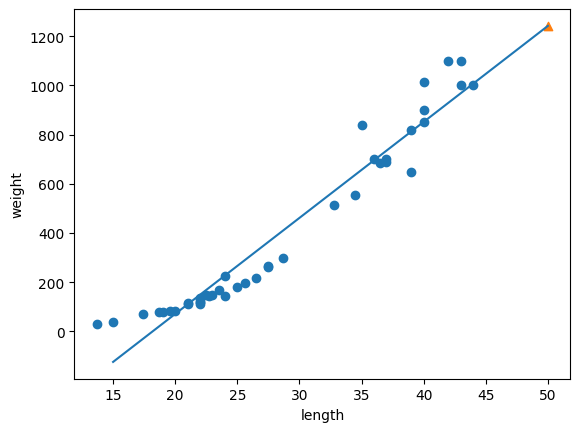

In [25]:
# 훈련 세트 산점도에 길이 15부터 50까지 직선 표시
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_]) # 주어진 두 점을 지나는 직선 표시
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
# 훈련 세트와 테스트 세트에 대한 결정계수 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


### 모델의 문제점
- 모델이 훈련세트에 과대적합되었음
- 직선이 0 이하로 내려가 현실을 반영하지 못함

## 다항 회귀(polynomial regression)
- 다항 회귀: 다항식을 사용한 선형 회귀
- 곡선은 y = a * x^2 + b * x + c의 형태를 갖는다.(x, y 위와 동일)

In [27]:
# x^2 계산을 위해 배열의 0번째 인덱스에 기존 수의 제곱값을 배치
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [30]:
# 모델을 훈련
lr = LinearRegression()

lr.fit(train_poly, train_target)  # target값은 변하지 않음

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [31]:
# 계수와 y절편값 출력
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


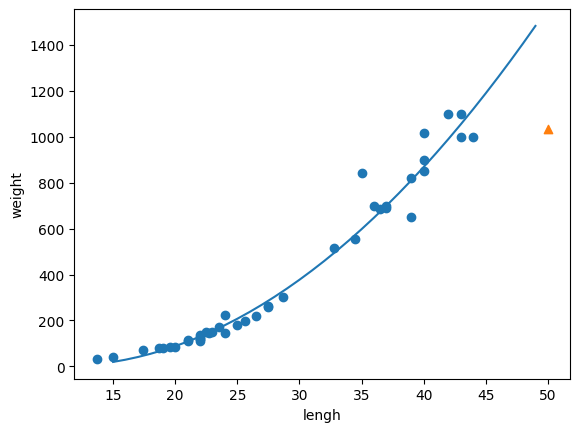

In [32]:
# 산점도에 곡선 표시하기
point = np.arange(15, 50)  # 구간별 직선을 그리기 위해 15-49까지의 정수 배열 생성
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50, 1033, marker='^')  # 50cm 농어 데이터
plt.xlabel('lengh')
plt.ylabel('weight')
plt.show()

In [34]:
# 훈련 세트와 테스트 세트에 대한 결정계수 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


- 훈련 세트의 경향성을 잘 따르고 있으며, 점수가 크게 높아짐
- 여전히 테스트 세트의 점수가 높은 과소적합이 남아있음